## Reinforcement Learning: Bandits problem 2
### Juan Felipe Godoy

## 1 Gaussian Process

In [88]:
# Set packages
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.linalg import cholesky, cho_solve
#np.random.seed(12345)

### Figure 2.2
#### Prior


In [89]:
N_star = 100
x_star = np.linspace(-7, 7, N_star)

In [90]:
# Kernel: squared exponetial
K_star = np.empty((N_star, N_star))

for i in range(N_star):
    for j in range(N_star):
        if i == j:
            K_star[i,j] = np.exp(-0.5*(x_star[i]-x_star[j])**2)
        else:
            K_star[i,j] = np.exp(-0.5*(x_star[i]-x_star[j])**2) + (0.1)**2

c:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


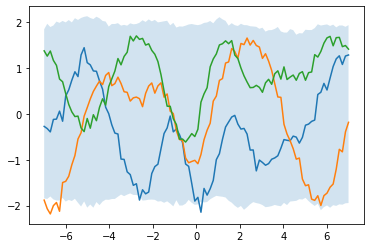

In [91]:
# Draw samples from prior distribution
prior = st.multivariate_normal.rvs(mean=[0]*N_star, cov=K_star, size=1000)

for i in range(3):
    plt.plot(x_star, prior[i])

plt.fill_between(x_star, np.percentile(prior, 2.5, axis=0),
np.percentile(prior, 97.5, axis=0),alpha=0.2)
plt.show()

### Implementing Algorithm 2.1

In [92]:
# Implementation of the algorithm 2.1

N_star = 100
x_star = np.linspace(-7,7,N_star)
x_obs = np.random.uniform(-7,7, 20)
#y = np.random.uniform(-7,7, 20)
params = [[1,1,0.1],[0.3,1.08,0.00005],[3,1.16,0.89]]


In [93]:
# SE kernel function
def kernel(x,y,l,sigma,noise_val):
    result = (sigma**2)*np.exp((-0.5/(l**2))*((x - y)**2)) + (noise_val**2)
    return result

In [94]:
# Covariance matrix
def covariance(x,y,l,sigma,noise_val,noise=True):
    cov_mat=np.empty((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            
            cov_mat[i,j] = kernel(x[i],y[j],l,sigma,noise_val)
    return cov_mat

In [95]:
# Function of the algorithm 2.1
def algorithm(x_obs,X,l,sigma,noise_val,e):

    c_matrix1 = covariance(x_obs,x_obs,l,sigma,noise_val)
    c_matrix2 = covariance(x_obs,X,l,sigma,noise_val,noise=False)
    c_matrix3 = covariance(X,X,l,sigma,noise_val, noise=False)
    
    output = np.random.multivariate_normal(np.zeros(len(x_obs)),cov = c_matrix1, size=1)

    L = np.linalg.cholesky(c_matrix1+np.eye(c_matrix1.shape[0])*sigma_noise)
    
    #Mean
    alpha = np.linalg.solve(L.T,np.linalg.solve(L,output.T))
    mean = np.dot(c_matrix2.T,alpha)

    #Variance
    v = np.linalg.solve(L,c_matrix2)
    variance = np.diag(c_matrix3 - np.dot(v.T,v))
    
    return output.flatten(),mean.flatten(),variance.flatten()



### Figure 2.5

[1, 1, 0.1]


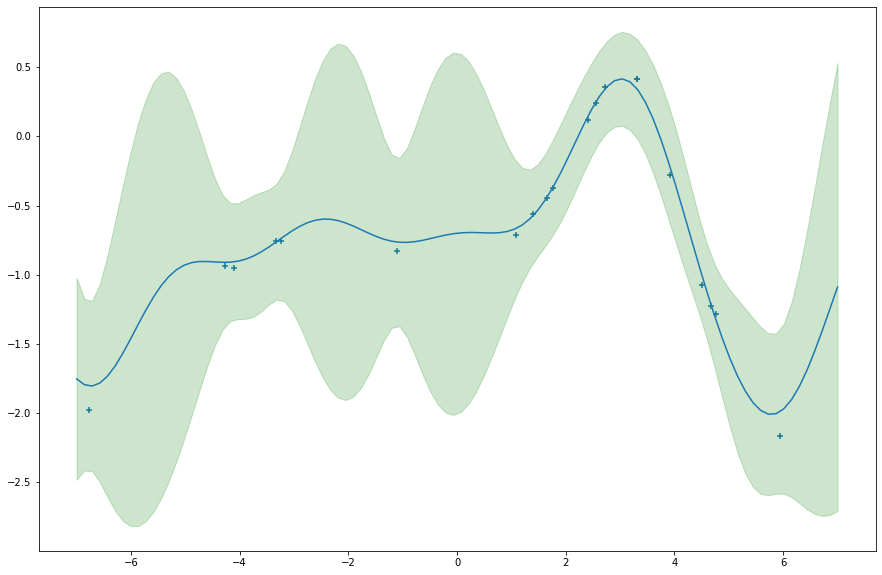

[0.3, 1.08, 5e-05]


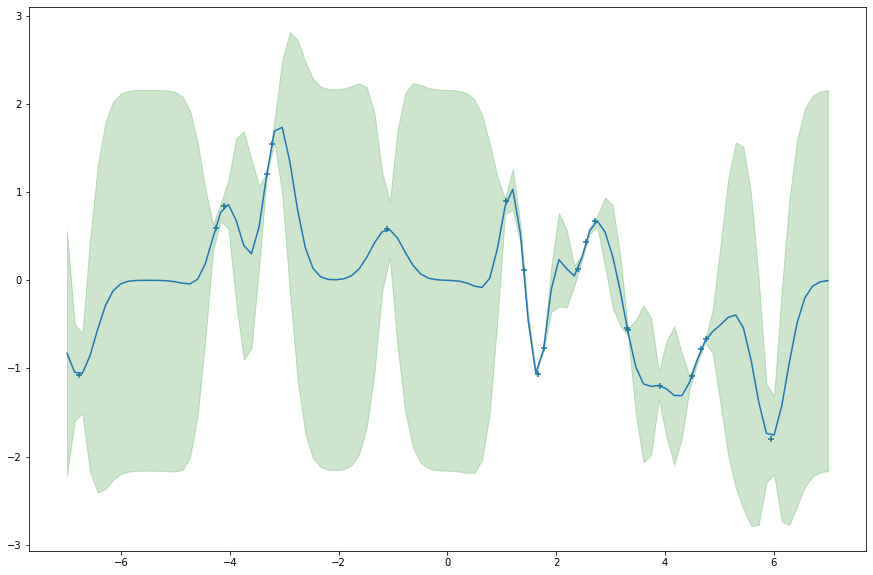

[3, 1.16, 0.89]


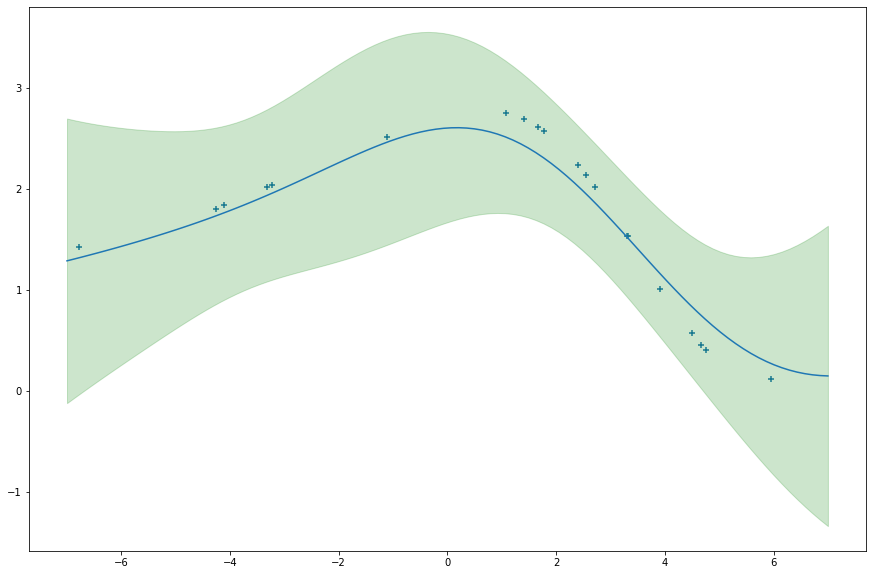

In [99]:
# Plot Figure 2.5
for p in params:
    print(p)
    l = p[0]
    sigma = p[1]
    sigma_noise = p[2]
    
    output,mean,variance = algorithm(x_obs,x_star,l,sigma,sigma_noise,0.1)
    sd = np.sqrt(variance)
    
    plt.figure(figsize=(15,10))
    plt.scatter(x_obs,output,marker='+')
    plt.plot(x_star,mean)
    plt.fill_between(x_star,mean-2*sd,mean+2*sd,color='g',alpha=0.2)
    plt.show()